In [1]:
import random
import pylab

In [2]:
# %matplotlib notebook

In [3]:
def rollDie():
    """Returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [4]:
rollN(10)

5565251541


In [5]:
def flip(numflips):
    heads = 0.0
    for i in range(numflips):
        if random.random() < 0.5:
            heads += 1
    return heads/numflips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

In [6]:
flip(3)

1.0

In [7]:
flipSim(100,1000)

0.5018399999999997

In [8]:
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp are positive integers: minExp<maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads -numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'bo')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'bo')


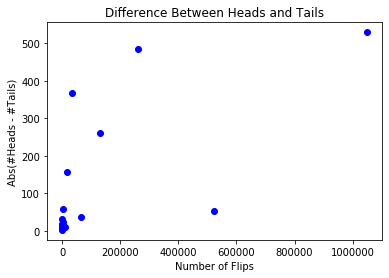

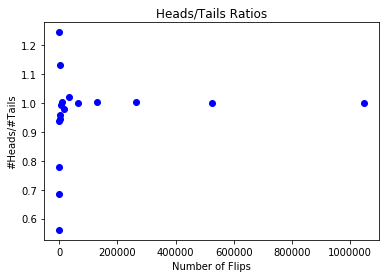

In [9]:
random.seed(0)
flipPlot(4,20)

In [10]:
def stdDev(X):
    """Assumes that X is a list of numbers.
    Returns the standard deviation of X"""
    mean = float(sum(X))/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return (tot/len(X)) ** 0.5    #Square root of mean difference

In [11]:
def CV(X):
    mean = sum(X)/float(len(X))
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

In [12]:
stdDev([1,2,3,4])

1.118033988749895

In [13]:
def makePlot(xVals, yVals, title, xLabel, ylabel, style, logX = False, logY = False):
    """Plots xVals vs yVals with supplied titles and labels."""
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(ylabel)
    pylab.plot(xVals, yVals, style)
    if logX: 
        pylab.semilogx()
    if logY:
        pylab.semilogy()
        
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return(numHeads, numTails)

def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp are positive integers
       minExp < maxExp
       Plot summaries of results of numTrials trials of 
       2 ** minExp to 2 ** maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs  = [], [], [], []
    ratiosCVs, diffsCVs = [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2 ** exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips', 'Mean Heads/Tails', 'bo', logX = True)
    
    title = 'SD Heads/Tails Ratio' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of flips', 'Standard Deviation', 'bo', logX = True, logY = True)
    
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title, 'Number of flips', 'Mean abs(#Heads - #Tails)', 'bo', logX = True, logY = True)
    
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of flips', 'Standard Deviation', 'bo', logX = True, logY = True)
    
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of flips', 'Coeff. of Var.', 'bo', logX = True)
    
    title = 'Coeff. of Var. Heads/Tails Ratio' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, 'Number of flips', 'Coeff. of Var.', 'bo', logX = True, logY = True)

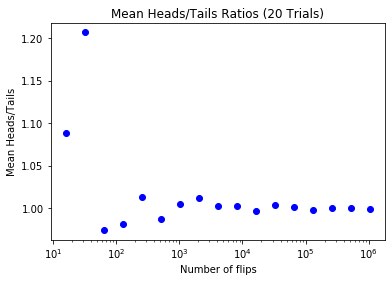

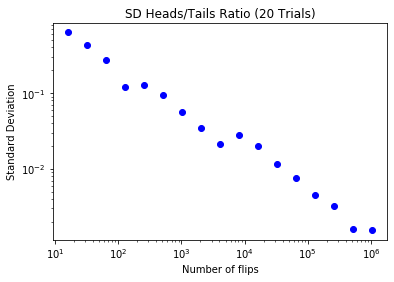

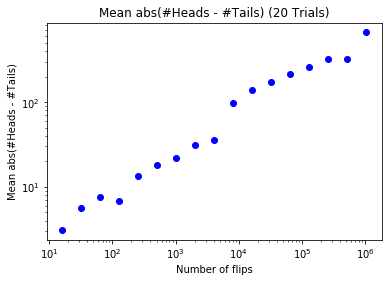

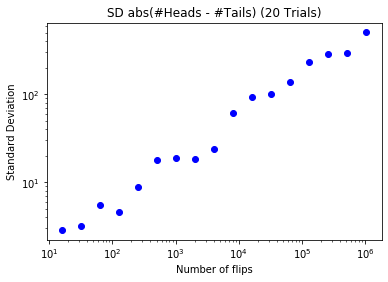

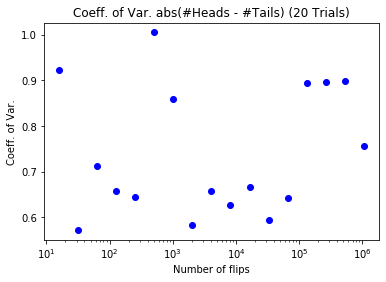

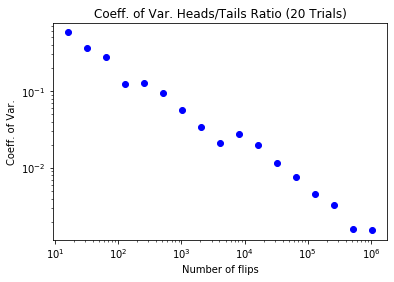

In [14]:
random.seed(0)
flipPlot1(4, 20, 20)

(array([ 21.,  66.,  96., 145., 174., 193., 134.,  92.,  65.,  16.]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <a list of 10 Patch objects>)

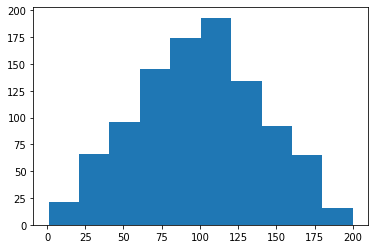

In [15]:
vals = [1, 200] #guarantee that vale will range from 1 to 200
for i in range(1000):
    num1 = random.choice(range(1,100))
    num2 = random.choice(range(1,100))
    vals.append(num1+num2)
pylab.hist(vals, bins = 10)

In [16]:
def flip(numflips):
    heads = 0.0
    for i in range(numflips):
        if random.random() < 0.5:
            heads += 1
    return heads/numflips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

In [17]:
def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials)+' trials of ' + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax - xmin)*0.02, (ymax-ymin)/2, 'Mean = ' + str(round(mean,4)) + '\nSD= ' +str(round(sd,4)), size = 'x-large')

In [18]:
def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 20)
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)
    

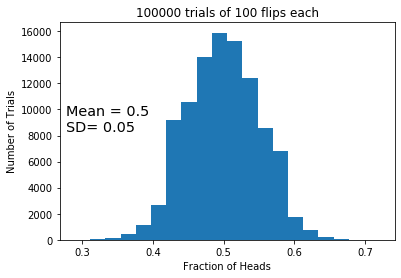

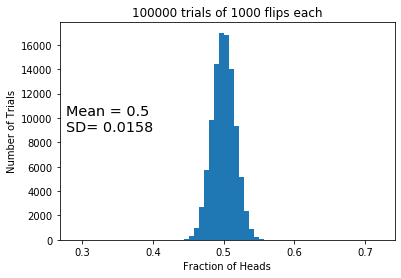

In [19]:
random.seed(0)
makePlots(100, 1000, 100000)

In [20]:
def showErrorBars(minExp, maxExp, numTrials):
    """Assumes minExp, maxExp are ints and minExp<maxExp
    numTrials is a positive integer.
    Plots mean fraction of heads with error bars"""
    means, sds = [], []
    xVals = []
    for exp in range(minExp, maxExp + 1):
        xVals.append(2**exp)
        fracHeads, mean, sd = flipSim(2**exp, numTrials)
        means.append(mean)
        sds.append(sd)
    pylab.errorbar(xVals, means, yerr = 2*pylab.array(sds))
    pylab.semilogx()
    pylab.title('Mean Fraction of Heads (' + str(numTrials) + ' trials)')
    pylab.xlabel('Number of flips per trial')
    pylab.ylabel('Fraction of heads & 95% confidence')
    

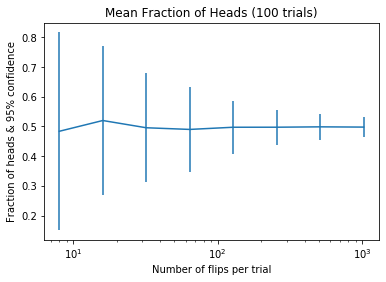

In [21]:
showErrorBars(3,10, 100)